In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("cleaned_titanic.csv")

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [8]:
scaler=StandardScaler()

In [28]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [29]:
X=scaler.fit_transform(X)

In [30]:
pca=PCA(n_components=4)

In [35]:
X_pca=pca.fit_transform(X)

In [36]:
print("Variance: ",pca.explained_variance_ratio_)

Variance:  [0.22972487 0.2128999  0.19321558 0.10495701]


In [37]:
print("Total Variance: ",pca.explained_variance_ratio_.sum())

Total Variance:  0.7407973615392813


In [39]:
pca_df=pd.DataFrame(
    data=X_pca,
    columns=['PC1','PC2','PC3','PC4']
)

In [44]:
pca_df["Survived"]=y.values

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Survived'], dtype='object')

In [41]:
pca_df.head()

,PC1,PC2,PC3,PC4,Survived
0,-1.005147,-0.754232,0.794791,0.439509,0
1,1.791739,1.230953,-1.222822,-0.448512,1
2,-0.529932,-0.449736,0.247758,-1.668231,1
3,1.494887,0.711579,0.329854,-0.959791,1
4,-1.196195,0.226514,0.857972,0.137615,0


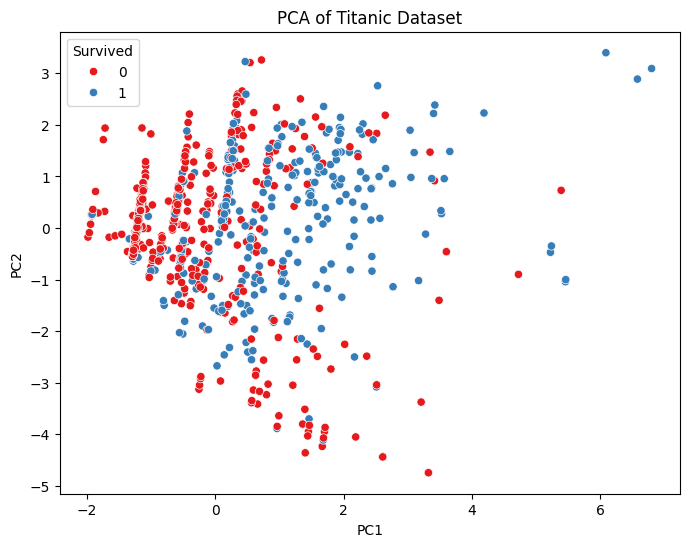

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Survived',
    data=pca_df,
    palette='Set1'
)
plt.title("PCA of Titanic Dataset")
plt.show()

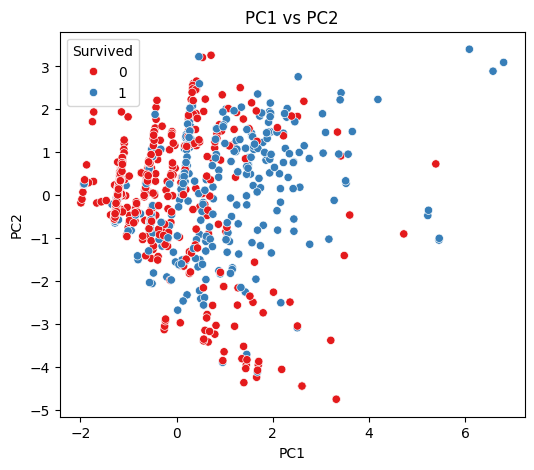

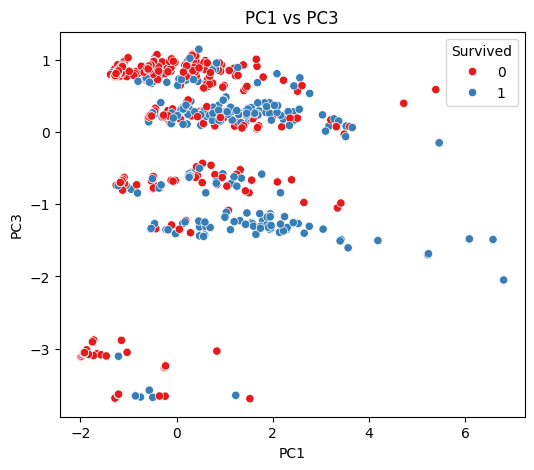

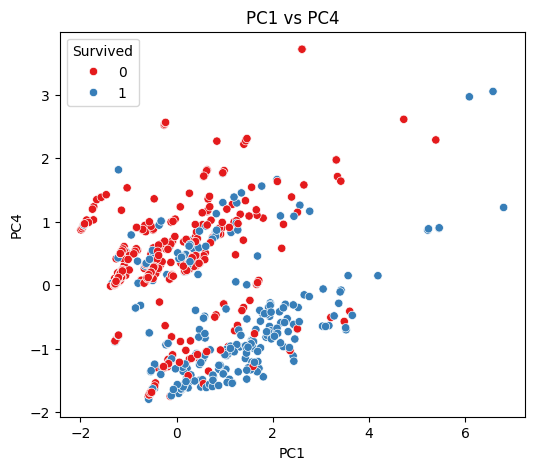

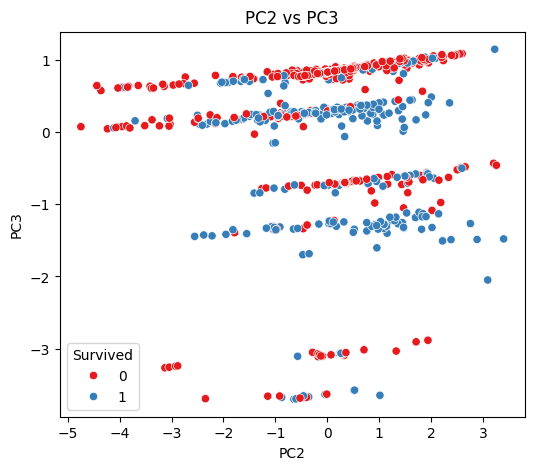

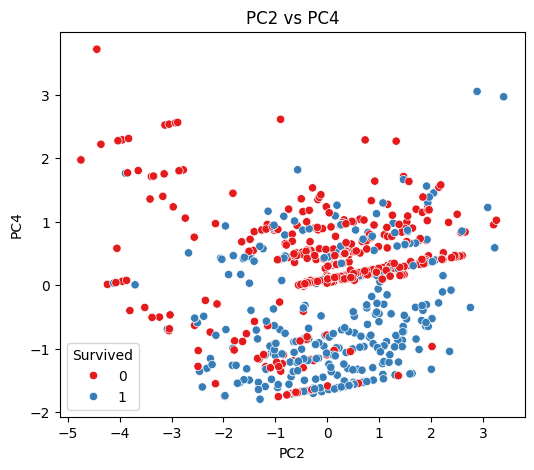

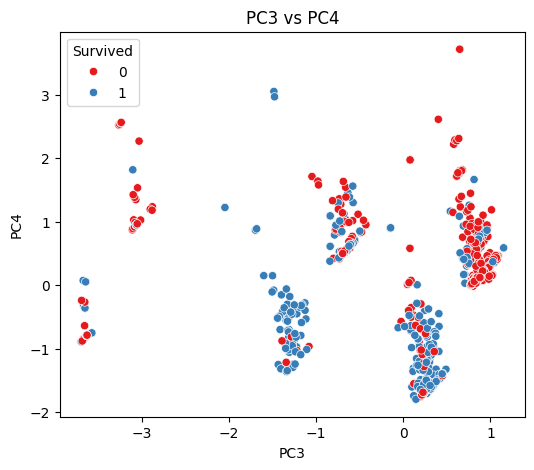

In [47]:
pairs = [
    ('PC1', 'PC2'),
    ('PC1', 'PC3'),
    ('PC1', 'PC4'),
    ('PC2', 'PC3'),
    ('PC2', 'PC4'),
    ('PC3', 'PC4')
]

for x, y in pairs:
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=x,
        y=y,
        hue='Survived',
        data=pca_df,
        palette='Set1'
    )
    plt.title(f"{x} vs {y}")
    plt.show()

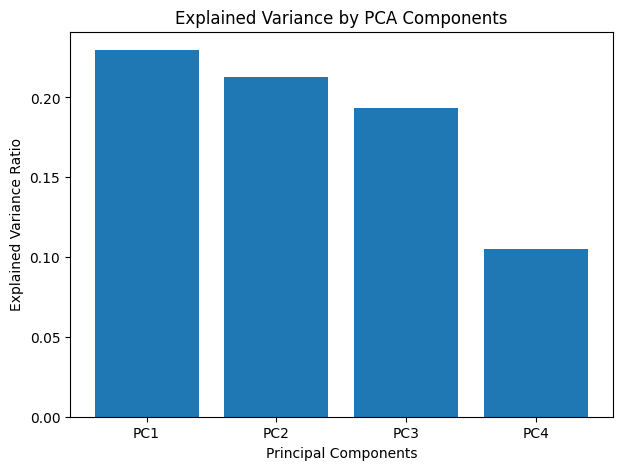

In [48]:
plt.figure(figsize=(7,5))
plt.bar(
    range(1, 5),
    pca.explained_variance_ratio_,
    tick_label=['PC1','PC2','PC3','PC4']
)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.show()
